# Project: Topic Modeling
Extracting the topics that are included within the dataset along with mapping each article to the corresponding topic names. Each document should be matched to the top three most relevant topic names including the matching **probability score**.
In this project, i will apply unsupervised learning technique(s) to extract the topics that are included within the dataset along with mapping each article to the corresponding topic names. These topics can then be used to search or understand as a brief about what the article/document is present.

There are several basic Topic Modeling models such as bag-of-words, unigram model, generative model.
##### Algorithms and Techniques used in Improving Topic Modeling:
Some algorithms used for Topic Modeling tasks are Latent Dirichlet Allocation, Latent Semantic Analysis, and Probabilistic Latent Semantic Analysis.
- **Latent Dirichlet Allocation**: Based on the Bayesian approach of describing all forms of statistical uncertainties in probabilities, LDA or Latent Dirichlet Allocation depicts an infinite mixture of topics probabilities that are represented in a document.
- **Latent Semantic Analysis**: Using Singular Value Decomposition as a technique, this algorithm helps in keeping documents and words in a semantic space for classification.
- **Probabilistic Latent Semantic Analysis**: Can be trained with an expectation-maximization algorithm, PLSA or Probabilistic Latent Semantic Analysis makes use of probability of a word in topic and topic in a document. This methodology is based on the multinomial distribution of words.

The best and frequently used algorithm to define and work out with Topic Modeling is **LDA** or **Latent Dirichlet Allocation** that digs out topic probabilities from statistical data available. While using the Topic Modeling methodology, there are some challenges. One of the first challenges faced is that **Topic Modeling doesn't provide a fixed number of topics**, hence, approaches such as the LDA or LSA require conditioning to handle issues like **overfitting**, **non-linearity**, and **discovery of too many generic words which are not useful**.

This notebook will help you idendify how to extract topic names. In each step of the project, i will discuss that what is doing!.

# Step 0: Install and Import package dependencies

In [1]:
# Install the necessary libraries
!pip install gensim
!pip install -U nltk
!pip install pyLDAvis
!pip install numpy
!pip install pandas
!pip install scikit-learn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136900 sha256=349175cb6f50f64f8b958f9289fc475217360c34371e2934a263fefea238ab7e
  Stored in directory: c:\users\a.abdelhafeez\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=2f0f3ac848235d24d5e5278545c4e54755df9990c7accdf69f2e1d81852fb572
  Stored in directory: c:\users\a.abdelhafeez\appdata\local\pip\cache\wheels\e4\7b\98\b646

In [2]:
# Imoprt the necessary base libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the necessary libraries for text preprocessing
import nltk
# nltk.download() # Select all and download
from nltk.stem import WordNetLemmatizer 
import gensim
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import CountVectorizer

# Import the necessary libraries for LDA topic modeling and tuning its parameters
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Import the necessary libraries for LDA topic visualization
from pyLDAvis import gensim_models
import pyLDAvis.sklearn
import pyLDAvis

# Step 1: Load the data
There's one file associated with this project:

- `Pubmed5k.xlsx`: Medical articles that are pubmed; 5000 articles (rows) x 3 features (columns).

Each row of the data represents a single article/document, and has its ID, Title and Abstract. I will use this information to extract the general topics into groups with similar keyword properties.

In [3]:
# Reading Articles
articles = pd.read_excel('Pubmed5k.xlsx')
articles.head()

,ArticleID,Title,Abstract
0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...
2,34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...
3,34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...
4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...


In [4]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleID  4999 non-null   int64 
 1   Title      4999 non-null   object
 2   Abstract   4999 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [5]:
# Document = Title + Abstract : all in one column
articles['Document'] = articles.Title + ' ' + articles.Abstract
articles.head()

,ArticleID,Title,Abstract,Document
0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...,Stable Coordination Variability in Overground ...
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...,Weak Hip Strength Increases Dynamic Knee Valgu...
2,34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...,Current and Future Projections of Amyotrophic ...
3,34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...,Disparities between Asian and Non-Asian Thromb...
4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...,Maternal Factors Predicting Loss to Follow-Up ...


# Step 2: Text Preprocessing
1. All words in lower case
2. Tokenize and text preprocessing using `gensim.utils.simple_preprocess()`
3. Text n-grams (2, 3), Lemmatization, and removing stop-words
4. Document Word Matrix (Bag of Words)

### Step 2.1: All words in lower case
- Convert all document's words in lower case charachers.

In [6]:
articles['Document_lower'] = articles.Document.str.lower()
articles.head()

,ArticleID,Title,Abstract,Document,Document_lower
0,34153941,Stable Coordination Variability in Overground ...,Coordination variability (CV) is commonly anal...,Stable Coordination Variability in Overground ...,stable coordination variability in overground ...
1,34153942,Weak Hip Strength Increases Dynamic Knee Valgu...,Clinical Scenario: Dynamic knee valgus (DKV) i...,Weak Hip Strength Increases Dynamic Knee Valgu...,weak hip strength increases dynamic knee valgu...
2,34153964,Current and Future Projections of Amyotrophic ...,Various methodologies have been reported to as...,Current and Future Projections of Amyotrophic ...,current and future projections of amyotrophic ...
3,34153968,Disparities between Asian and Non-Asian Thromb...,As outcomes for acute ischemic stroke (AIS) va...,Disparities between Asian and Non-Asian Thromb...,disparities between asian and non-asian thromb...
4,34153978,Maternal Factors Predicting Loss to Follow-Up ...,Because hearing loss in children can result in...,Maternal Factors Predicting Loss to Follow-Up ...,maternal factors predicting loss to follow-up ...


In [7]:
# Check lowercase words
articles.Document_lower.head(1).to_list()

['stable coordination variability in overground walking and running at preferred and fixed speeds. coordination variability (cv) is commonly analyzed to understand dynamical qualities of human locomotion. the purpose of this study was to develop guidelines for the number of trials required to inform the calculation of a stable mean lower limb cv during overground locomotion. three-dimensional lower limb kinematics were captured for 10 recreational runners performing 20 trials each of preferred and fixed speed walking and running. stance phase cv was calculated for 9 segment and joint couplings using a modified vector coding technique. the number of trials required to achieve a cv mean within 10% of 20 strides average was determined for each coupling and individual. the statistical outputs of mode (walking vs running) and speed (preferred vs fixed) were compared when informed by differing numbers of trials. a minimum of 11 trials were required for stable mean stance phase cv. with fewer

### Step 2.2: Tokenize and Text Preprocessing
- Using `gensim.utils.preprocess()`: 
    - Convert a document into a list of tokens.
    - Removing Punctuation.
    - Removing unnecessary characters altogether

In [8]:
def tokens(document):
    return simple_preprocess(str(document), deacc=True)
articles['Document_clean'] = articles.Document_lower.apply(tokens)
articles[['Document', 'Document_clean']].head()

,Document,Document_clean
0,Stable Coordination Variability in Overground ...,"[stable, coordination, variability, in, overgr..."
1,Weak Hip Strength Increases Dynamic Knee Valgu...,"[weak, hip, strength, increases, dynamic, knee..."
2,Current and Future Projections of Amyotrophic ...,"[current, and, future, projections, of, amyotr..."
3,Disparities between Asian and Non-Asian Thromb...,"[disparities, between, asian, and, non, asian,..."
4,Maternal Factors Predicting Loss to Follow-Up ...,"[maternal, factors, predicting, loss, to, foll..."


In [77]:
articles.Document_clean.head(1)

0    [stable, coordination, variability, in, overgr...
Name: Document_clean, dtype: object

### Step 2.3: Text n-grams, Lemmatization, and removing stop-words
- **n-grams**: Consider all groups of n words in a row as new terms, called n-grams. This way, cases such as “white house” will be taken into account and added to the vocabulary list
- **Lemmatization**: Identify prefixes and suffixes of words to isolate them from their root. This way, words like “play,” “played,” or “player” are represented by the word “play.” Stemming can be useful to reduce the number of words in the vocabulary list while preserving their meaning , but it slows preprocessing considerably because it must be applied to each word in the corpus.
- **Stop-words**: Do not take into account groups of words lacking in meaning or utility. These include articles and prepositions but may also include words that are not useful for our specific case study, such as certain common verbs.


In [11]:
# Apply n-grams (2: bi-grams, 3: tri-grams)
bigram = gensim.models.Phrases(articles.Document_clean, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[articles.Document_clean], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# Trigram example
print(trigram_mod[bigram_mod[articles.Document_clean[4997]]]) # Exmaple: aged_years, quasi_experimental

['pre', 'intervention', 'effects', 'of', 'community', 'based', 'intervention', 'targeting', 'alcohol', 'use', 'lef', 'the', 'role', 'of', 'participatory', 'research', 'and', 'publicity', 'this', 'study', 'explores', 'the', 'impact', 'of', 'the', 'pre', 'intervention', 'effects', 'of', 'community', 'based', 'intervention', 'this', 'refers', 'to', 'participatory', 'research', 'processes', 'and', 'parallel', 'publicity', 'in', 'the', 'media', 'on', 'changes', 'in', 'alcohol', 'use', 'and', 'relevant', 'mechanisms', 'rules', 'and', 'norms', 'about', 'alcohol', 'accessibility', 'of', 'alcohol', 'in', 'formal', 'setting', 'among', 'adolescents', 'before', 'any', 'intervention', 'is', 'implemented', 'the', 'aim', 'was', 'to', 'investigate', 'the', 'contribution', 'of', 'these', 'processes', 'pre', 'intervention', 'effects', 'to', 'changes', 'in', 'intervention', 'targeted', 'factors', 'before', 'any', 'actual', 'intervention', 'was', 'implemented', 'in', 'quasi_experimental', 'study', 'data',

In [12]:
def Lemmatization(word):
    lemmatization = WordNetLemmatizer()
    word_lemmatize = [w_lemma for w_lemma in set([lemmatization.lemmatize(word, pos=p) for p in ['n', 'a', 's', 'r', 'v']]) if w_lemma != word]
    word_lemmatize = word if len(word_lemmatize) == 0 else word_lemmatize[0]
    return word_lemmatize

# Apply all of 3 techniques in one function (lemmatization, n-grams and stop-words)
def apply_n_gram_lemmatization_stopwords(document):
    return ' '.join([(Lemmatization(word))
            for word in trigram_mod[bigram_mod[document]]
                       if word not in nltk.corpus.stopwords.words('english') and len(word) > 1])

# Check Example
apply_n_gram_lemmatization_stopwords('ahmad playes eats younger than compared football'.split(' '))

'ahmad play eat young compare football'

In [13]:
# Apply apply_n_gram_lemmatization_stopwords() on all documents
articles['Document_clean_100percent'] = articles.Document_clean.apply(apply_n_gram_lemmatization_stopwords)
articles.Document_clean_100percent.head()

0    stable coordination variability overground wal...
1    weak hip strength increase dynamic knee valgus...
2    current future projection amyotrophic_lateral ...
3    disparity asian non asian thrombolyzed acute i...
4    maternal factor predict loss follow_up newborn...
Name: Document_clean_100percent, dtype: object

### Step 2.4: Document Word Matrix (Bag of Words)
- **CountVectorizer**: Convert a collection of text documents to a matrix of token counts.
    1. `min_df` parameter: consider words that has occurred at least 5 times.
    2. `stop_words`: remove built-in english stopwords.
    3. `lowercase`: convert all words to lowercase letters.
    4. `token_pattern`: all words of length greater than 2


In [61]:
vectorizer = CountVectorizer(analyzer='word', min_df=5, stop_words='english', lowercase=True, token_pattern='[a-zA-Z0-9]{3,}')
articles_bow = vectorizer.fit_transform(articles.Document_clean_100percent)
print(vectorizer.get_feature_names()[:10])
print(articles_bow.toarray())

['aav', 'ababa', 'abandon', 'abc', 'abdomen', 'abdominal', 'aberrant', 'aberration', 'ability', 'abiotic']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# Step 3: Create initial LDA model using sklearn
LDA is an unsupervised learning algorithm that attempts to describe a set of observations as a mixture of different categories. These categories are themselves a probability distribution over the features. LDA is a generative probability model, which means it attempts to provide a model for the distribution of outputs and inputs based on latent variables. There is some terminology that one needs to be familiar with, to understand LDA:
1. **Document**: Probability distributions over latent topics
2. **Topic**: Probability distributions over words.
    - The word ‘topic’ refers to associating a certain word with a definition. For instance, when the machine reads-horse is black, it tokenizes the sentence and comes to the conclusion that there are two topics; horse which is an animal and black, a colour.

#### Breifly how  LDA Algorithm does work
LDA can be made to go backwards as well:

- First, each word in each document is randomly assigned to one of the topics.
- Now, it is assumed that all topic assignments except for the current one are correct.
- The proportion of words in document say, ‘d’ that are currently assigned to topic ‘t’ is equal to p(topic t | document d) and proportion of assignments topic ‘t’ over all documents that belong to word ‘w’ is equal to p(word w | topic t).
- These two proportions are multiplied and assigned a new topic based on that probability.

LDA assumes that the words in each document are related. Then after running through the aforementioned steps, it figures out how a certain might have been created. And, this very solution will be used to generate topic and word distributions over a corpus.

#### LDA Parameters in sklearn:
- `n_components`: # of topics
- `max_iter`: max # of iteration of learning
- `learning_method`: the method that controlled by learning rate 
- `random_state`: random state
- `batch_size`: # of doc in each learning iteration
- `evaluate_every`: calculate perplexity each iteration
- `n_jobs`: use all CPUs
- and etc..

In [30]:
lda_model = LatentDirichletAllocation(n_components=20, max_iter=10, learning_method='online', random_state=100, batch_size=128,
                                      evaluate_every = -1, n_jobs = -1)
lda_output = lda_model.fit_transform(articles_bow)
print(lda_model)

# Log Likelyhood: Higher the better
# Calculate approximate log-likelihood as score.
print(f'Log Likelihood: {lda_model.score(articles_bow)}')

# Perplexity: Lower the better.
# Perplexity = exp(-1. * log-likelihood per word)
print(f'Perplexity: {lda_model.perplexity(articles_bow)}')

# Model parameters
print(f'LDA Parameters: {lda_model.get_params()}')

LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)
Log Likelihood: -4734540.497495378
Perplexity: 2049.8713313075687
LDA Parameters: {'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


# Step 4: Tuning parameters
- Using **Grid Search** technique to **pick the number of topics** and get the best estimator of LDA.

In [62]:
components = range(5, 31)
scores = []
perplexity = []
for component in components:
    model = LatentDirichletAllocation(n_components=component, max_iter=10, learning_method='online',
                                      random_state=100, batch_size=128,
                                      evaluate_every = -1, n_jobs = -1)
    lda_output = model.fit_transform(articles_bow)
    scores.append(model.score(articles_bow))
    perplexity.append(model.perplexity(articles_bow))
    print(f'Component: {component} is done..')

Component: 5 is done..
Component: 6 is done..
Component: 7 is done..
Component: 8 is done..
Component: 9 is done..
Component: 10 is done..
Component: 11 is done..
Component: 12 is done..
Component: 13 is done..
Component: 14 is done..
Component: 15 is done..
Component: 16 is done..
Component: 17 is done..
Component: 18 is done..
Component: 19 is done..
Component: 20 is done..
Component: 21 is done..
Component: 22 is done..
Component: 23 is done..
Component: 24 is done..
Component: 25 is done..
Component: 26 is done..
Component: 27 is done..
Component: 28 is done..
Component: 29 is done..
Component: 30 is done..


Text(0, 0.5, 'Perplexity')

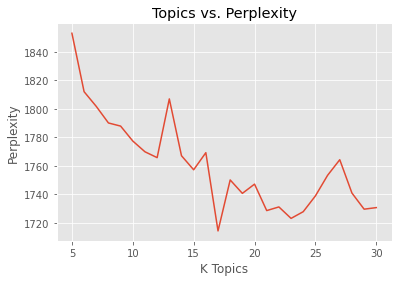

In [63]:
plt.style.use('ggplot')
plt.plot(components, perplexity)
plt.title('Topics vs. Perplexity')
plt.xlabel('K Topics')
plt.ylabel('Perplexity')

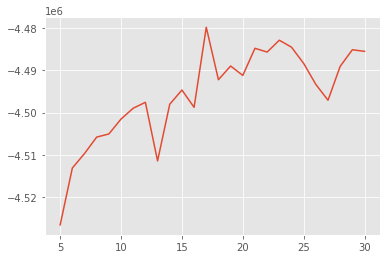

In [64]:
plt.plot(components, scores)

# Step 5: Pick the best LDA model
Which that has Hight Log likelihoos score and Low Perplexity and **n_component = 17** is acheived that.

In [65]:
# Best LDA Estimator
best_lda_model = LatentDirichletAllocation(n_components=17, max_iter=10, learning_method='online',
                                      random_state=100, batch_size=128,
                                      evaluate_every = -1, n_jobs = -1)
lda_output = best_lda_model.fit_transform(articles_bow)

# Model parameters
print(f'Best LDA Parameters: {best_lda_model.get_params()}')

# Log Likelihood Score
print(f'Best Log Likelihood Score: {best_lda_model.score(articles_bow)}')

# Perplexity
print(f'Model Perplexity: {best_lda_model.perplexity(articles_bow)}')

Best LDA Parameters: {'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 17, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}
Best Log Likelihood Score: -4479812.913025034
Model Perplexity: 1714.444025121091


# Step 6: Predict the training set
- Assign the propability for each ducument per topic
- Get the best 3 Topics per document with its propability
- What is each topic can present?

In [66]:
# Get the Topic Matrix
lda_output = best_lda_model.transform(articles_bow)
# Assign the propability for each ducument per topic
df_document_topic = pd.DataFrame(np.round(lda_output, 2),
                                 columns=["Topic" + str(i) for i in range(best_lda_model.n_components)],
                                 index=["Doc" + str(i) for i in range(len(articles))])
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16
Doc0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00,0.01,0.09,0.00,0.34,0.00,0.00,0.46,0.00
Doc1,0.00,0.00,0.00,0.25,0.00,0.00,0.23,0.10,0.00,0.00,0.05,0.03,0.08,0.00,0.00,0.25,0.00
Doc2,0.00,0.00,0.00,0.00,0.00,0.00,0.42,0.00,0.00,0.06,0.12,0.04,0.35,0.00,0.00,0.00,0.00
Doc3,0.03,0.00,0.00,0.04,0.00,0.01,0.78,0.06,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Doc4,0.00,0.36,0.13,0.00,0.06,0.00,0.15,0.04,0.02,0.00,0.21,0.02,0.00,0.00,0.00,0.00,0.00
Doc5,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,0.00
Doc6,0.31,0.00,0.00,0.00,0.00,0.08,0.00,0.01,0.07,0.00,0.00,0.17,0.19,0.12,0.00,0.00,0.05
Doc7,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.07,0.00,0.17,0.00,0.00,0.00,0.00
Doc8,0.70,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.03,0.00,0.02,0.09,0.13,0.00,0.00,0.00,0.00
Doc9,0.29,0.00,0.00,0.02,0.21,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.12,0.02,0.00,0.01


In [67]:
# Get the best 3 Topics per document with its propability
c = ['1st Max','2nd Max','3rd Max', '1st Max prop','2nd Max prop','3rd Max prop']
three_most_relevant_topic_names = df_document_topic.apply(lambda x:
                                                          pd.Series(x.nlargest(3).index, index=c[:3]).append(
                                                              pd.Series(x.nlargest(3).values, index=c[3:])),
                                                          axis=1)
three_most_relevant_topic_names.head(10)

,1st Max,2nd Max,3rd Max,1st Max prop,2nd Max prop,3rd Max prop
Doc0,Topic15,Topic12,Topic7,0.46,0.34,0.09
Doc1,Topic3,Topic15,Topic6,0.25,0.25,0.23
Doc2,Topic6,Topic12,Topic10,0.42,0.35,0.12
Doc3,Topic6,Topic8,Topic7,0.78,0.09,0.06
Doc4,Topic1,Topic10,Topic6,0.36,0.21,0.15
Doc5,Topic7,Topic1,Topic10,0.60,0.29,0.11
Doc6,Topic0,Topic12,Topic11,0.31,0.19,0.17
Doc7,Topic0,Topic12,Topic8,0.64,0.17,0.10
Doc8,Topic0,Topic12,Topic11,0.70,0.13,0.09
Doc9,Topic0,Topic4,Topic12,0.29,0.21,0.21


In [68]:
# What is each topic can present?
keywords = np.array(vectorizer.get_feature_names())
topic_keywords = []
for topic_weights in best_lda_model.components_:
    top_keyword_locs = (-topic_weights).argsort()[:20]
    topic_keywords.append(keywords.take(top_keyword_locs))
topic_keywords = pd.DataFrame(topic_keywords,
                                 columns=['Word'+str(i) for i in range(len(topic_keywords[0]))],
                                 index=['Topic'+str(i) for i in range(len(topic_keywords))]
                                )
topic_keywords

,Word0,Word1,Word2,Word3,Word4,Word5,Word6,Word7,Word8,Word9,Word10,Word11,Word12,Word13,Word14,Word15,Word16,Word17,Word18,Word19
Topic0,patient,treatment,case,disease,clinical,diagnosis,report,therapy,present,treat,year,chronic,oral,include,primary,symptom,follow,study,lesion,cause
Topic1,child,woman,use,stress,exposure,level,age,effect,study,high,low,bone,male,maternal,adult,year,adolescent,china,result,mother
Topic2,use,base,detection,surface,material,image,method,demonstrate,limit,sensor,application,screen,device,light,nanoparticles,high,probe,develop,spectrum,fluorescence
Topic3,effect,high,acid,increase,concentration,study,rat,activity,treatment,level,water,group,muscle,reduce,significantly,low,decrease,content,growth,control
Topic4,sensitivity,cost,diagnostic,specificity,black,curve,accuracy,resection,diagnosis,value,airway,auc,transplant,cut,discrimination,donor,white,transplantation,area,aortic
Topic5,cancer,tumor,drug,cell,breast,therapy,lung,receptor,therapeutic,survival,target,variant,mutation,anti,inhibitor,immune,efficacy,treatment,gastric,resistance
Topic6,study,risk,patient,age,high,associate,factor,use,year,score,association,analysis,group,data,rate,low,cohort,mortality,compare,population
Topic7,intervention,trial,group,effect,control,cognitive,fatigue,exercise,pain,study,outcome,week,participant,treatment,change,pre,base,post,controlled,physical
Topic8,disease,diabetes,blood,cardiac,heart,cardiovascular,risk,sex,glucose,cause,metabolic,hypertension,type,obesity,study,pressure,associate,chronic,mortality,increase
Topic9,food,vaccine,vaccination,product,dietary,risk,safety,intake,milk,health,coverage,consumption,dose,environmental,policy,community,household,low,united,states


<AxesSubplot:xlabel='Topic Num'>

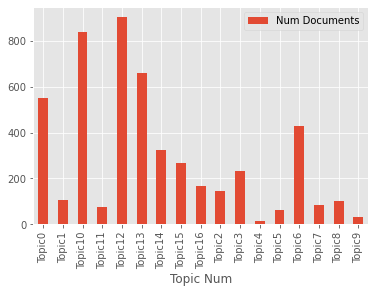

In [69]:
# Visualize number of document per tpoic
plt.style.use('ggplot')
df_topic_distribution = three_most_relevant_topic_names['1st Max'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution.sort_values('Topic Num').plot(x='Topic Num', y='Num Documents', kind='bar')

# Visualize all Topics
- The pyLDAvis offers the best visualization to view the topics-keywords distribution.
- A good topic model will have non-overlapping, fairly big sized blobs for each topic. This seems to be the case here. So, we are good.

In [70]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.sklearn.prepare(best_lda_model, articles_bow, vectorizer, mds='tsne')
pyLDAvis.save_html(LDAvis_prepared, 'lda_result.html')
# pyLDAvis.disable_notebook()
LDAvis_prepared

C:\Users\a.abdelhafeez\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
C:\Users\a.abdelhafeez\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
12      2.972113  -13.786730       1        1  16.315175
10     -7.288966   86.150291       2        1  14.574981
13     38.049393   65.587624       3        1   9.750876
6     -42.227043    6.162611       4        1   9.492053
0     -63.238548  -41.294518       5        1   9.112378
15    -48.099060   56.473579       6        1   5.303139
3     -48.087841  120.044159       7        1   4.759402
14     17.708776  131.640900       8        1   4.172210
1      92.846191   -8.328438       9        1   4.086451
2      47.892864  -45.589878      10        1   3.972874
16     92.039185   50.145565      11        1   3.944431
8     -94.766495   15.104293      12        1   3.090295
11     -9.109381  -64.732552      13        1   3.046449
7     -94.606842   77.712318      14        1   2.855952
5      44.945538   14.845922      15        1   2.464759
9      -1.493484   35.842178      16        1   1.805466
4      71.312836  105.574364      17        1   1.253111, topic_info=            Term         Freq        Total Category  logprob  loglift
4902     patient  5863.000000  5863.000000  Default  30.0000  30.0000
1605       covid  2175.000000  2175.000000  Default  29.0000  29.0000
936       cancer  1712.000000  1712.000000  Default  28.0000  28.0000
1038        cell  2399.000000  2399.000000  Default  27.0000  27.0000
6360      specie  1571.000000  1571.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
7251  validation    61.794818   197.575035  Topic17  -4.8039   3.2172
479         area    70.596908   691.270081  Topic17  -4.6708   2.0980
1860   detection    62.439510   507.932653  Topic17  -4.7936   2.2834
3115        high    67.454101  3091.159394  Topic17  -4.7163   0.5547
7484        year    49.869582  1728.372160  Topic17  -5.0183   0.8340

[1152 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
11        6  0.980831    ablation
23        1  0.015075  absorption
23        7  0.964776  absorption
24        8  0.081434    abstract
24       13  0.916133    abstract
...     ...       ...         ...
7484     11  0.014464        year
7484     12  0.009257        year
7484     13  0.003471        year
7484     16  0.021407        year
7484     17  0.028929        year

[3132 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 11, 14, 7, 1, 16, 4, 15, 2, 3, 17, 9, 12, 8, 6, 10, 5])

# Predicting new tests
- Apply the same routine of the preprocessing and transform the LDA model with its text BOW.

In [71]:
def predict_top_3_topics(document):
    document = document.lower()
    document = simple_preprocess(str(document), deacc=True)
    document = apply_n_gram_lemmatization_stopwords(document)
    document_vectorized = vectorizer.transform([document])
    lda_output = best_lda_model.transform(document_vectorized)
    topics_top_3_scores = sorted(lda_output[0], reverse=True)[:3] 
    topics_top_3_index = [list(lda_output[0]).index(i) for i in topics_top_3_scores]
    topics_top_3_names = ['Topic' + str(i) for i in topics_top_3_index]
    topics = {'Topic' + str(i): {'Score':j, 'Words':topic_keywords.iloc[i, :].values.tolist()} for i,j in zip(topics_top_3_index, topics_top_3_scores)} #[df_topic_keywords.iloc[i, :].values.tolist() for i in topics_top_3_index]
    return pd.DataFrame(topics)

In [72]:
# New Covid Article
new_article_1 = 'In late December 2019, a previous unidentified coronavirus, currently named as the 2019 novel coronavirus#, emerged from Wuhan, China, and resulted in a formidable outbreak in many cities in China and expanded globally, including Thailand, Republic of Korea, Japan, United States, Philippines, Viet Nam, and our country (as of 2/6/2020 at least 25 countries). The disease is officially named as Coronavirus Disease-2019 (COVID-19, by WHO on February 11, 2020). It is also named as Severe Pneumonia with Novel Pathogens on January 15, 2019 by the Taiwan CDC, the Ministry of Health and is a notifiable communicable disease of the fifth category. COVID-19 is a potential zoonotic disease with low to moderate (estimated 2%–5%) mortality rate. Person-to-person transmission may occur through droplet or contact transmission and if there is a lack of stringent infection control or if no proper personal protective equipment available, it may jeopardize the first-line healthcare workers. Currently, there is no definite treatment for COVID-19 although some drugs are under investigation. To promptly identify patients and prevent further spreading, physicians should be aware of the travel or contact history of the patient with compatible symptoms.'
predict_top_3_topics(new_article_1)

,Topic16,Topic0,Topic10
Score,0.446751,0.167935,0.155113
Words,"[covid, infection, cov, sars, virus, hiv, test...","[patient, treatment, case, disease, clinical, ...","[health, care, study, use, social, service, re..."


In [73]:
# New Covid Article
new_article_2 = 'In 2003, a new coronavirus, the etiology of a mysterious pneumonia, also originated from southeast China, especially Guangdong province, and was named SARS coronavirus that fulfilled the Koch’s postulate.4 The mortality rate caused by the virus was around 10%–15%.5,6 Through the years, the medical facilities have been improved; nevertheless, no proper treatment or vaccine is available for the SARS.6 The emergence of another outbreak in 2012 of novel coronavirus in Middle East shared similar features with the outbreak in 2003.7 Both were caused by coronavirus but the intermediate host for MERS is thought to be the dromedary camel and the mortality can be up to 37%.5 The initial clinical manifestations for both SARS and MERS are usually nonspecific except that the majority of patients presented with fever and respiratory symptoms. Unprotected hospital staff who were exposed to patients’ droplets or through contact prone to be infected and nosocomial infections ensue.1,6 Furthermore, cases associated with travel had been identified for SARS, MERS, and COVID-19.5,8–11 Because of global transportation and the popularity of tourism, COVID-19 is a genuine threat to Taiwan.'
predict_top_3_topics(new_article_2)

,Topic16,Topic0,Topic10
Score,0.465431,0.29711,0.066187
Words,"[covid, infection, cov, sars, virus, hiv, test...","[patient, treatment, case, disease, clinical, ...","[health, care, study, use, social, service, re..."


In [74]:
# New Breast Cancer Article
new_article_3 = 'Focused on understanding the difference in the microenvironments that surround cancer cells in original, or primary tumors, versus sites where the tumor metastasizes, the investigators studied tumor tissue from 55 metastatic breast cancer patients, representing 51 primary cancers and 102 metastases. The investigators used advanced genetic tools to identify significant differences in tumor cells and immune features, or markers of change in the immune response, between primary tumors and their metastatic progeny.'
predict_top_3_topics(new_article_3)

,Topic5,Topic0,Topic13
Score,0.384251,0.289965,0.142144
Words,"[cancer, tumor, drug, cell, breast, therapy, l...","[patient, treatment, case, disease, clinical, ...","[cell, protein, expression, gene, pathway, rol..."


In [75]:
# New Researchers discover over 40 new genetic markers for Alzheimer’s disease
new_article_4 = 'Seventy-five different loci were identified for this disease trait, of which 33 that had been identified earlier were confirmed, while the rest were newly discovered. The pathway enrichment analyses clarified the role of several tau-binding proteins. These included amyloid-beta peptides, which is the abnormal protein that is a major component of amyloid plaques found in people with AD, as well as amyloid precursor protein (APP) in late-onset AD. The identification of the ADAM17 gene, which encodes an alpha-secretase, as an AD/related dementia (ADD) trait indicates possible deregulation of APP metabolism through non-amyloid pathways that ultimately lead to the accumulation of amyloid protein. The researchers also found six other genes that likely modulate APP metabolism, including ICA1, ICA1L, DGKQ, and DOC2A.'
predict_top_3_topics(new_article_4)

,Topic13,Topic8,Topic0
Score,0.589755,0.106962,0.08513
Words,"[cell, protein, expression, gene, pathway, rol...","[disease, diabetes, blood, cardiac, heart, car...","[patient, treatment, case, disease, clinical, ..."
